In [ ]:
pip install ucimlrepo scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

from skopt import BayesSearchCV
np.int = int # Workaround for bug in skopt

from ucimlrepo import fetch_ucirepo

from yellowbrick.classifier.rocauc import roc_auc

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

# Carga de datos

In [ ]:
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)
aids = aids_clinical_trials_group_study_175.data.original
aids.head()

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,10056,0,948,2,48,89.8128,0,0,0,100,...,0,0,1,0,1,0,422,477,566,324
1,10059,1,1002,3,61,49.4424,0,0,0,90,...,0,1,3,0,1,0,162,218,392,564
2,10089,0,961,3,45,88.4520,0,1,1,90,...,1,1,3,0,1,1,326,274,2063,1893
3,10093,0,1166,3,47,85.2768,0,1,0,100,...,1,1,3,0,1,0,287,394,1590,966
4,10124,0,1090,0,43,66.6792,0,1,0,100,...,1,1,3,0,0,0,504,353,870,782


In [ ]:
aids.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
pidnum,2139.0,248778.252454,234237.289399,10056.0,81446.5000,190566.0000,280277.0000,990077.00000
cid,2139.0,0.243572,0.429338,0.0,0.0000,0.0000,0.0000,1.00000
time,2139.0,879.098177,292.274324,14.0,727.0000,997.0000,1091.0000,1231.00000
trt,2139.0,1.520804,1.127890,0.0,1.0000,2.0000,3.0000,3.00000
age,2139.0,35.248247,8.709026,12.0,29.0000,34.0000,40.0000,70.00000
wtkg,2139.0,75.125311,13.263164,31.0,66.6792,74.3904,82.5552,159.93936
hemo,2139.0,0.084151,0.277680,0.0,0.0000,0.0000,0.0000,1.00000
homo,2139.0,0.661057,0.473461,0.0,0.0000,1.0000,1.0000,1.00000
drugs,2139.0,0.131370,0.337883,0.0,0.0000,0.0000,0.0000,1.00000
karnof,2139.0,95.446470,5.900985,70.0,90.0000,100.0000,100.0000,100.00000


# Análisis de datos

In [ ]:
aids.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
pidnum,2139.0,248778.252454,234237.289399,10056.0,81446.5000,190566.0000,280277.0000,990077.00000
cid,2139.0,0.243572,0.429338,0.0,0.0000,0.0000,0.0000,1.00000
time,2139.0,879.098177,292.274324,14.0,727.0000,997.0000,1091.0000,1231.00000
trt,2139.0,1.520804,1.127890,0.0,1.0000,2.0000,3.0000,3.00000
age,2139.0,35.248247,8.709026,12.0,29.0000,34.0000,40.0000,70.00000
wtkg,2139.0,75.125311,13.263164,31.0,66.6792,74.3904,82.5552,159.93936
hemo,2139.0,0.084151,0.277680,0.0,0.0000,0.0000,0.0000,1.00000
homo,2139.0,0.661057,0.473461,0.0,0.0000,1.0000,1.0000,1.00000
drugs,2139.0,0.131370,0.337883,0.0,0.0000,0.0000,0.0000,1.00000
karnof,2139.0,95.446470,5.900985,70.0,90.0000,100.0000,100.0000,100.00000


In [ ]:
aids.drop(columns=['pidnum','treat','zprior'], inplace=True)

In [ ]:
aids.isna().sum()

cid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

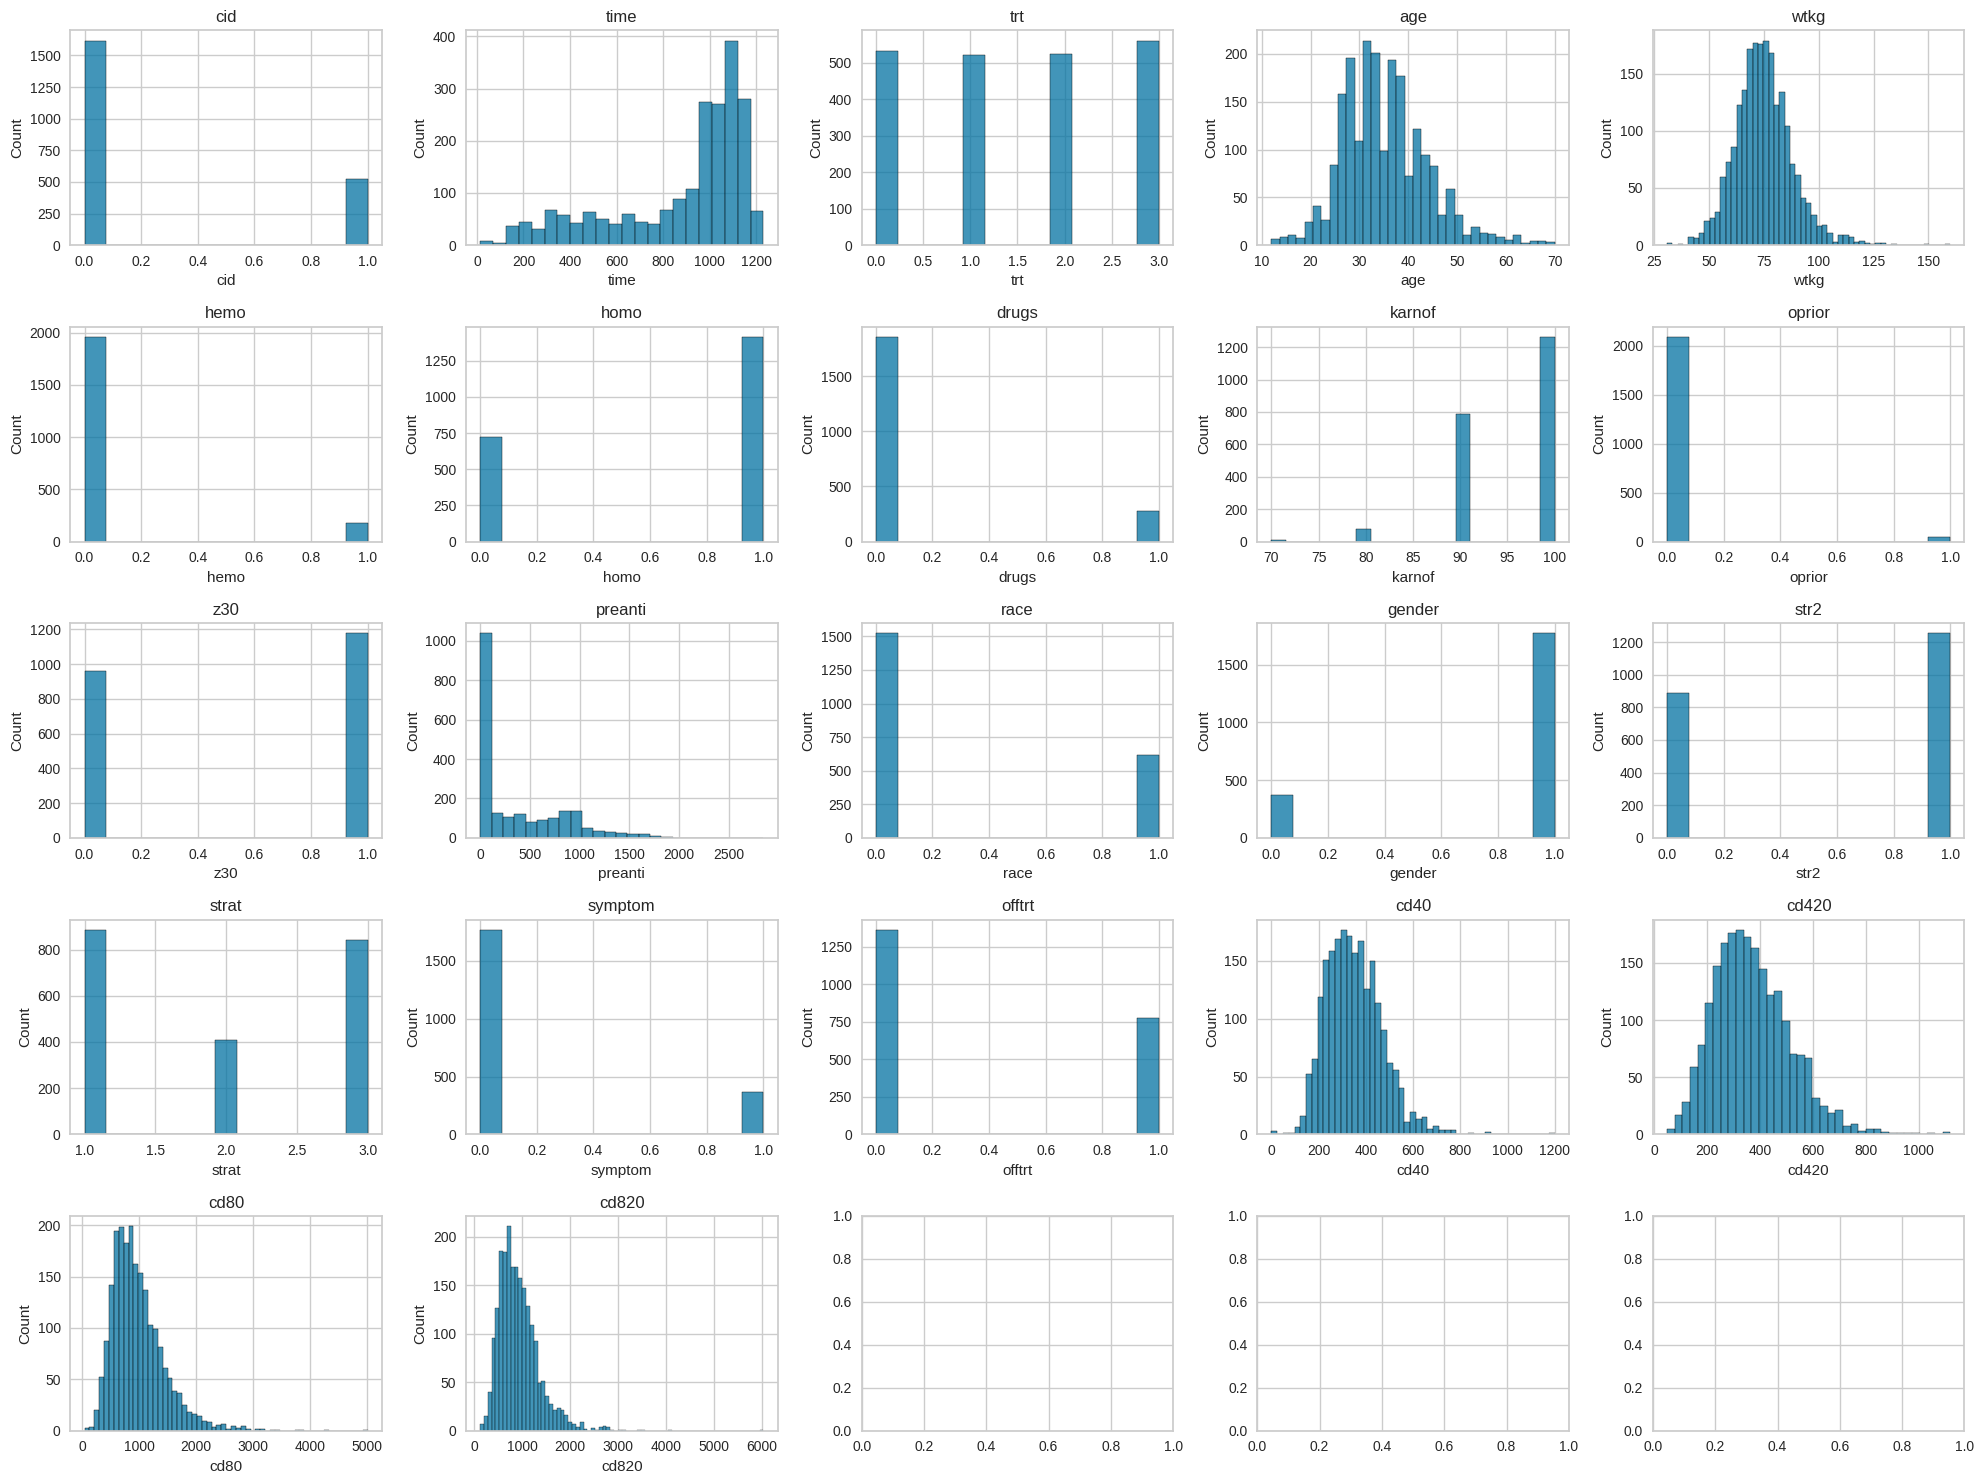

In [ ]:
df = aids
fig, axes = plt.subplots(5,5,figsize=(20,15))
for i, c in enumerate(df.columns):
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=df,ax=ax)
    else:
        b = sns.histplot(x=c,data=df,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

In [ ]:
for i, c in enumerate(df.columns):
  if(df[c].unique().size >= 10): continue
  print(c, df[c].unique())

cid [0 1]
trt [2 3 0 1]
hemo [0 1]
homo [0 1]
drugs [0 1]
karnof [100  90  80  70]
oprior [0 1]
z30 [0 1]
race [0 1]
gender [0 1]
str2 [0 1]
strat [1 3 2]
symptom [0 1]
offtrt [0 1]


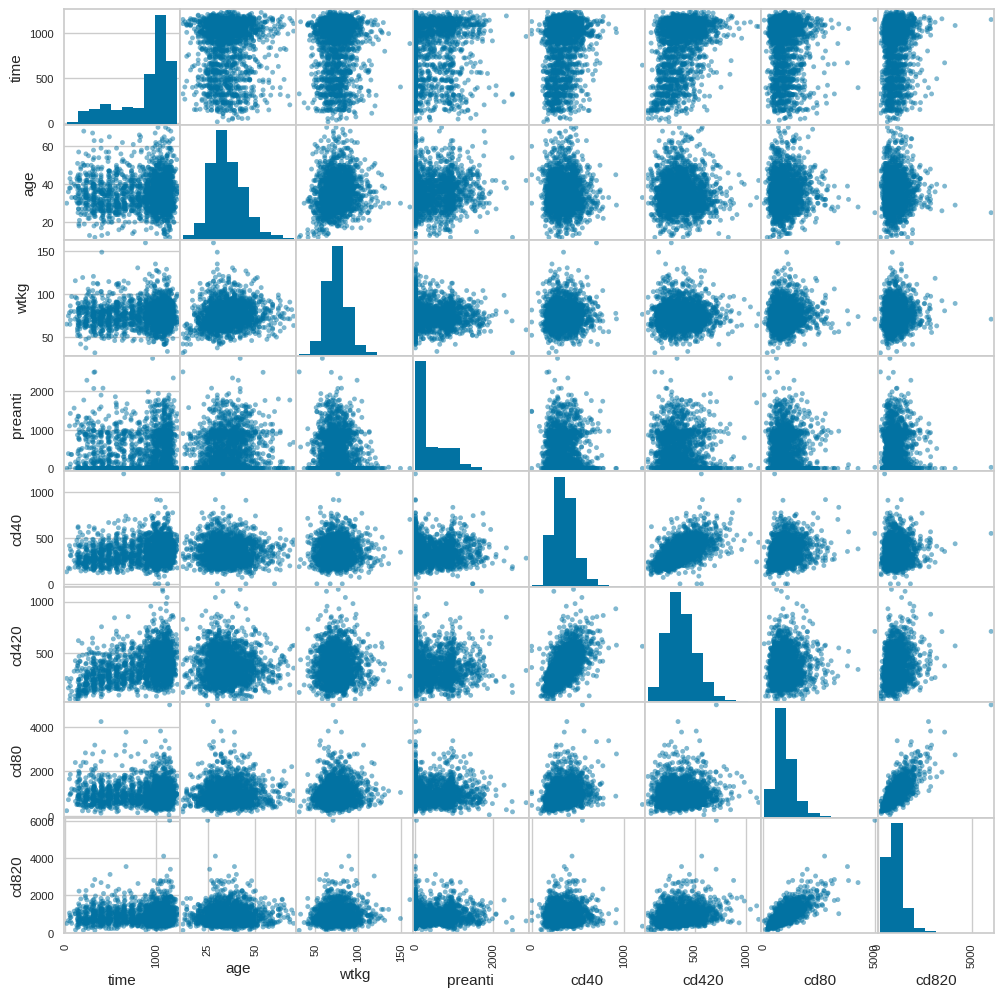

In [ ]:
df2 = df[['time','age','wtkg','preanti','cd40','cd420','cd80','cd820']]
scatter_matrix(df2,figsize=(12,12));

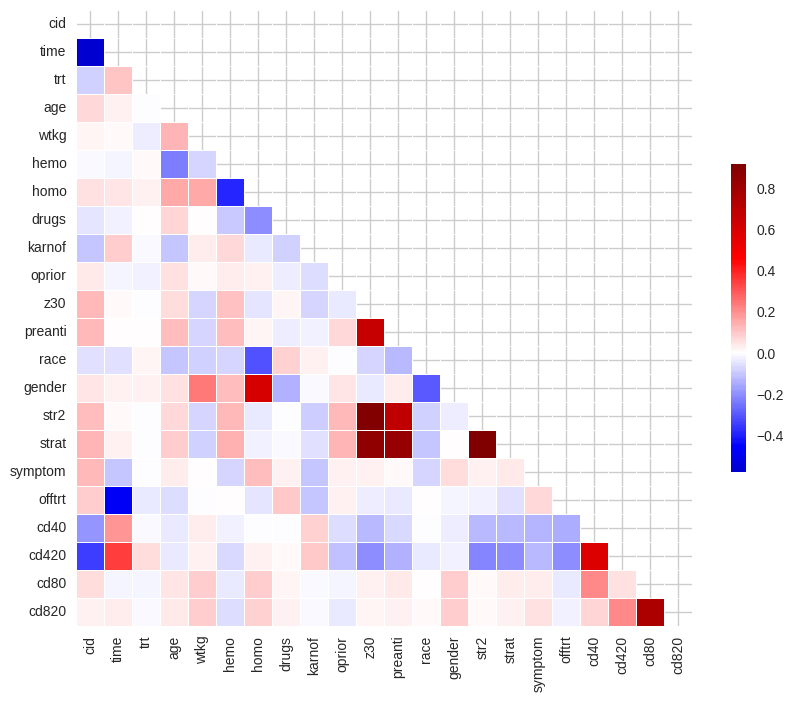

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Preproceso de datos



In [ ]:
aids["time"] = [int(x)  for x in aids["time"]/100]

In [ ]:
X=aids.loc[:,aids.columns != 'cid']
y=aids['cid'].copy()

aids_train_X, aids_test_X, aids_train_y, aids_test_y  = train_test_split(X,y, test_size=0.2, random_state=0)
aids_train_X.shape, aids_test_X.shape, aids_train_y.shape, aids_test_y.shape

((1711, 21), (428, 21), (1711,), (428,))

In [ ]:
def oneHotEncode(train,test,col):
  train_output = train.copy();
  test_output = test.copy();

  #Get dummies for the training data
  train_encoded = pd.get_dummies(train_output[col], prefix=col, dtype=int)
  # Get dummies for the test data
  test_encoded = pd.get_dummies(test_output[col], prefix=col, dtype=int)

  # Make sure the columns are the same for both DataFrames
  # This is important to ensure that the model can be trained and tested consistently
  missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
  for col in missing_cols:
      test_encoded[col] = 0

  # Reorder the columns to have the same order in both DataFrames
  test_encoded = test_encoded[train_encoded.columns]

  # Concat the one-hot encoded attributes
  train_output = pd.concat([train, train_encoded], axis=1)
  test_output = pd.concat([test, test_encoded], axis=1)

  # Finally, drop the original categorical column
  train_output.drop(col, axis=1, inplace=True)
  test_output.drop(col, axis=1, inplace=True)

  return train_output, test_output

In [ ]:
aids_train_X, aids_test_X = oneHotEncode(aids_train_X, aids_test_X,'trt');
aids_train_X, aids_test_X = oneHotEncode(aids_train_X, aids_test_X,'strat');
aids_train_X, aids_test_X = oneHotEncode(aids_train_X, aids_test_X,'karnof');
aids_train_X.head()

,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,trt_0,trt_1,trt_2,trt_3,strat_1,strat_2,strat_3,karnof_80,karnof_90,karnof_100
1132,10,33,80.1000,0,1,0,90,0,1,679,...,0,1,0,0,0,0,1,0,1,0
905,8,31,58.8000,0,1,0,100,1,1,764,...,1,0,0,0,0,0,1,0,0,1
2005,11,21,68.0000,1,0,0,100,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2013,11,44,81.1944,1,1,0,100,0,1,411,...,0,0,1,0,0,0,1,0,0,1
1755,9,32,67.1328,0,0,1,100,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
aids_train_X_sd = aids_train_X.copy()
aids_test_X_sd = aids_test_X.copy()
scaler = StandardScaler()
aids_train_X_sd[:] = scaler.fit_transform(aids_train_X_sd[:])
aids_test_X_sd[:] = scaler.fit_transform(aids_test_X_sd[:])
aids_train_X_sd.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
time,1711.0,1.349657e-16,1.000292,-2.848258,-0.439617,0.248566,0.592658,1.280841
age,1711.0,-2.180216e-16,1.000292,-2.657702,-0.712786,-0.140752,0.545689,3.977893
wtkg,1711.0,-4.152792e-16,1.000292,-3.248939,-0.629706,-0.070258,0.535761,6.216580
hemo,1711.0,3.114594e-17,1.000292,-0.304290,-0.304290,-0.304290,-0.304290,3.286335
homo,1711.0,5.813909e-17,1.000292,-1.398247,-1.398247,0.715181,0.715181,0.715181
drugs,1711.0,-3.114594e-17,1.000292,-0.401964,-0.401964,-0.401964,-0.401964,2.487785
karnof,1711.0,2.906955e-17,1.000292,-4.224205,-0.898870,0.763797,0.763797,0.763797
oprior,1711.0,2.387855e-17,1.000292,-0.142388,-0.142388,-0.142388,-0.142388,7.023071
z30,1711.0,8.253674e-17,1.000292,-1.105476,-1.105476,0.904587,0.904587,0.904587
preanti,1711.0,-3.322234e-17,1.000292,-0.817633,-0.817633,-0.492419,0.783835,5.282281


In [ ]:
aids_train_X_mm = aids_train_X.copy()
aids_test_X_mm = aids_test_X.copy()
scaler = MinMaxScaler()
aids_train_X_mm[:] = scaler.fit_transform(aids_train_X_mm[:])
aids_test_X_mm[:] = scaler.transform(aids_test_X_mm[:])
aids_train_X_mm.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
time,1711.0,0.689801,0.242254,0.0,0.583333,0.750000,0.833333,1.0
age,1711.0,0.400522,0.150746,0.0,0.293103,0.379310,0.482759,1.0
wtkg,1711.0,0.343239,0.105677,0.0,0.276713,0.335817,0.399841,1.0
hemo,1711.0,0.084746,0.278584,0.0,0.000000,0.000000,0.000000,1.0
homo,1711.0,0.661601,0.473303,0.0,0.000000,1.000000,1.000000,1.0
drugs,1711.0,0.139100,0.346152,0.0,0.000000,0.000000,0.000000,1.0
karnof,1711.0,0.846873,0.200540,0.0,0.666667,1.000000,1.000000,1.0
oprior,1711.0,0.019871,0.139599,0.0,0.000000,0.000000,0.000000,1.0
z30,1711.0,0.549971,0.497642,0.0,0.000000,1.000000,1.000000,1.0
preanti,1711.0,0.134040,0.163985,0.0,0.000000,0.053315,0.262539,1.0


# Reducción de dimesionalidad

PCA

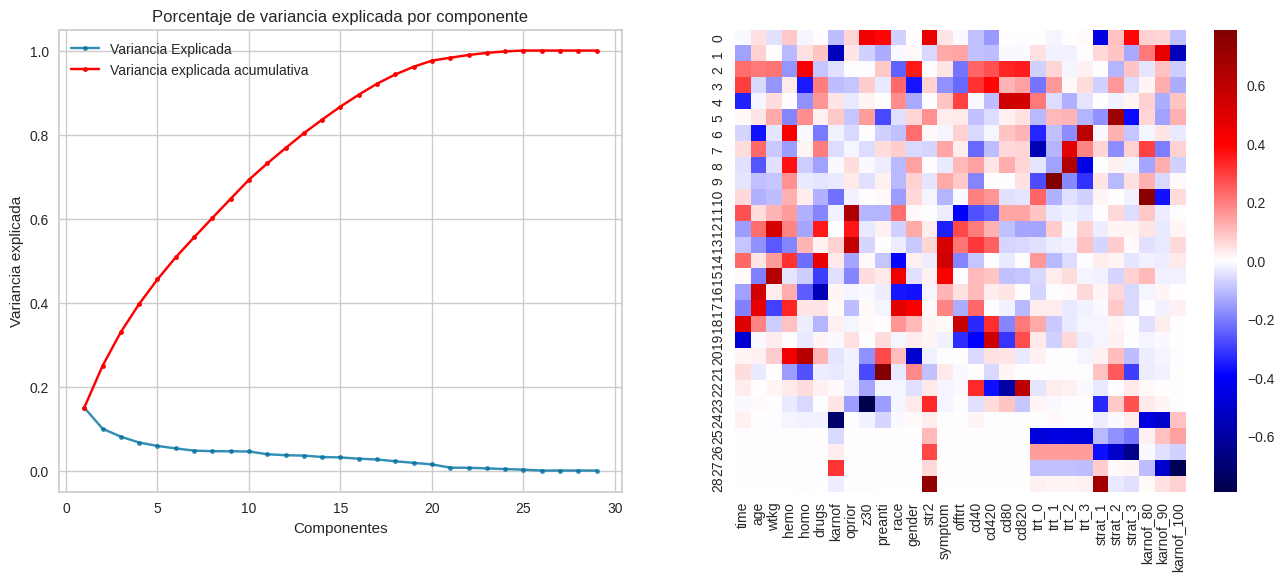

In [ ]:
myPCA = PCA().fit(aids_train_X_sd);

fig, axes = plt.subplots(1,2,figsize=(16,6))

ax = axes.reshape(-1)[0]
ax.set_title('Porcentaje de variancia explicada por componente');
ax.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
ax.set_ylabel('Variancia explicada');
ax.set_xlabel('Componentes');
ax.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
ax.legend();

sns.heatmap(myPCA.components_, cmap='seismic',
            xticklabels=list(aids_train_X_sd.columns),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=False, ax=axes.reshape(-1)[1]);

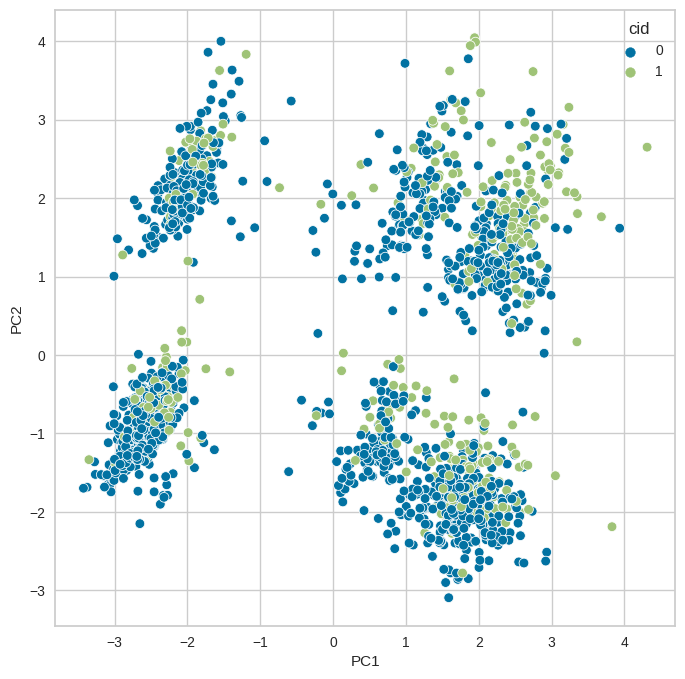

In [ ]:
transformed_aids_train = myPCA.transform(aids_train_X_sd)
aids_train_X_sd_PCA = aids_train_X_sd.copy()
aids_train_X_sd_PCA[['PC1','PC2', 'PC3']] = transformed_aids_train[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=aids_train_y, data=aids_train_X_sd_PCA)

In [ ]:
import plotly.express as px
px.scatter_3d(x=transformed_aids_train[:,0], y=transformed_aids_train[:,1], z=transformed_aids_train[:,2],color=aids_train_y,height=800 )

# Entrenamiento

In [ ]:
def save_results(clf,  X_test, y_test, nclf, df):
  df.loc[nclf,'train acc'] = clf.best_score_
  df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
  df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
  df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
  df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
  return df

results_df = pd.DataFrame()

niter=15
cv=5
cls = ['censoring','failure']

## Lineal

### Regresión logística

In [ ]:
lr = LogisticRegression(max_iter=10000)
print(np.mean(cross_val_score(lr, aids_train_X, aids_train_y, cv=cv)))

0.8632482566961622


In [ ]:
param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)};
lr_gs =  GridSearchCV(lr, param, cv=cv, n_jobs=-1, refit=True);
lr_gs.fit(aids_train_X, aids_train_y);

In [ ]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
25,"{'C': 3.981071705534969, 'penalty': 'l2'}",0.865582,1
35,"{'C': 125.89254117941663, 'penalty': 'l2'}",0.864998,2
33,"{'C': 63.0957344480193, 'penalty': 'l2'}",0.864998,3
37,"{'C': 251.18864315095772, 'penalty': 'l2'}",0.864418,4
39,"{'C': 501.18723362727246, 'penalty': 'l2'}",0.864413,5


              precision    recall  f1-score   support

   censoring       0.94      0.87      0.90       341
     failure       0.60      0.77      0.68        87

    accuracy                           0.85       428
   macro avg       0.77      0.82      0.79       428
weighted avg       0.87      0.85      0.86       428



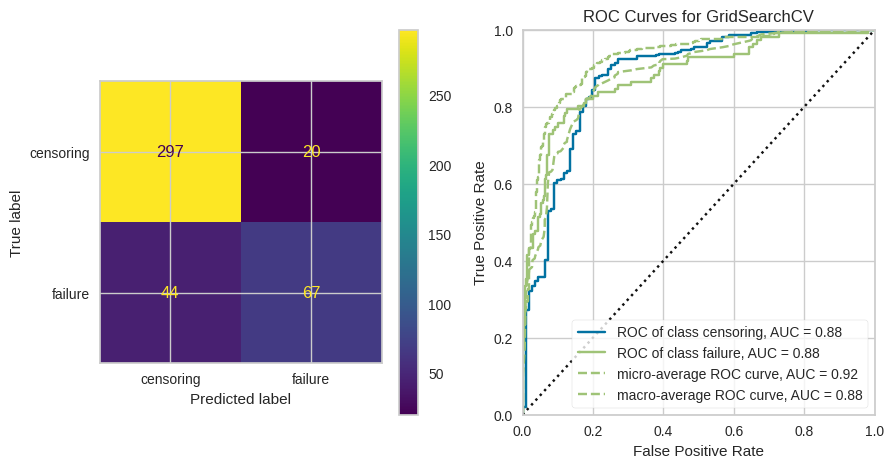

In [ ]:
model = lr_gs
print(classification_report(model.predict(aids_test_X), aids_test_y,target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X, aids_train_y, aids_test_X, aids_test_y, classes=cls, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X, aids_test_y, 'Logistic', results_df);

### Naïve Bayes

In [ ]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb, aids_train_X, aids_train_y, cv=10)))

0.7966170270637835


In [ ]:
param = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

gnb_gs = GridSearchCV(gnb, param, cv=cv, n_jobs=-1, refit=True)
gnb_gs.fit(aids_train_X, aids_train_y);

In [ ]:
show_html(pd.DataFrame(gnb_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
3,{'var_smoothing': 1e-06},0.832280,1
4,{'var_smoothing': 1e-05},0.830525,2
2,{'var_smoothing': 1e-07},0.810052,3
0,{'var_smoothing': 1e-09},0.801864,4
5,{'var_smoothing': 0.0001},0.801287,5


              precision    recall  f1-score   support

   censoring       0.90      0.87      0.89       327
     failure       0.63      0.69      0.66       101

    accuracy                           0.83       428
   macro avg       0.77      0.78      0.77       428
weighted avg       0.84      0.83      0.83       428



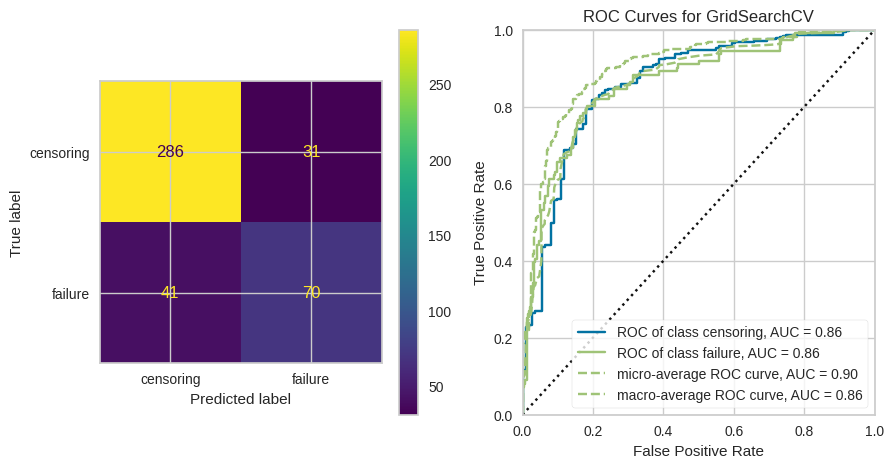

In [ ]:
model = gnb_gs

print(classification_report(model.predict(aids_test_X), aids_test_y,target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X, aids_train_y, aids_test_X, aids_test_y, classes=cls, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X, aids_test_y, 'GNB', results_df);

### KNN

In [ ]:
knn =  KNeighborsClassifier()
print(np.mean(cross_val_score(knn, aids_train_X_mm, aids_train_y, cv=10)))

0.7843499252005983


In [ ]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15],
          'weights':['distance', 'uniform'],
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs = GridSearchCV(knn, param, cv=cv, n_jobs=-1, refit=True)
knn_gs.fit(aids_train_X_mm, aids_train_y);

In [ ]:
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
54,"{'leaf_size': 5, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.793705,1
126,"{'leaf_size': 20, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.793705,1
18,"{'leaf_size': 1, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.793705,1
90,"{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.793705,1
162,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 7, 'weights': 'distance'}",0.793705,1


              precision    recall  f1-score   support

   censoring       0.95      0.79      0.86       382
     failure       0.27      0.65      0.38        46

    accuracy                           0.77       428
   macro avg       0.61      0.72      0.62       428
weighted avg       0.88      0.77      0.81       428



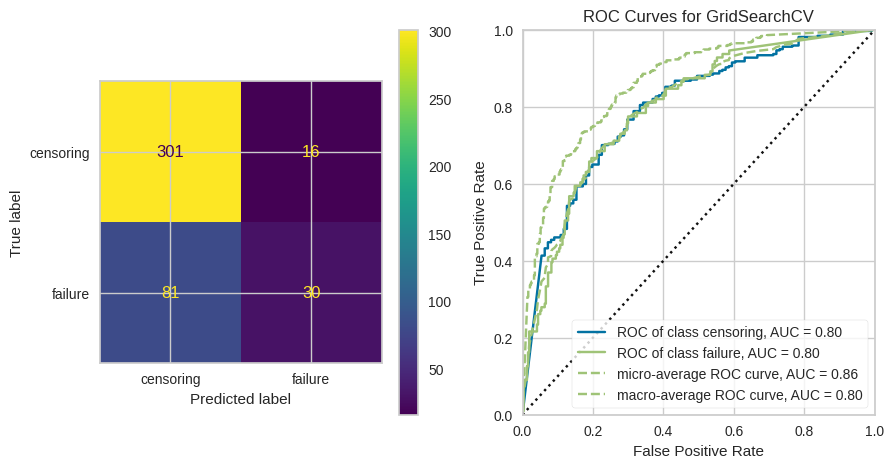

In [ ]:
model = knn_gs

print(classification_report(model.predict(aids_test_X_mm), aids_test_y, target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X_mm,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X_mm, aids_train_y, aids_test_X_mm, aids_test_y, classes=cls, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X_mm, aids_test_y, 'KNN', results_df);

## No lineal

### MLP

In [ ]:
param = {'hidden_layer_sizes':[10, 50, 100, 200, 300, 400],
'activation':['relu', 'identity', 'logistic'],
'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
'momentum': [0.95, 0.90, 0.85, 0.8],
'learning_rate_init': [0.001, 0.01, 0.1,1],
'n_iter_no_change':[10, 20, 40, 50, 60],
'learning_rate': ['constant', 'invscaling', 'adaptive'],}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0);
mlp_bs =  BayesSearchCV(mlp,param,
                        n_iter=niter,
                        cv=cv, n_jobs=-1,
                        refit=True,random_state=0)
mlp_bs.fit(aids_train_X_sd, aids_train_y);

show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html());

,params,mean_test_score,rank_test_score
11,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 50}",0.882536,1
13,"{'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.85, 'n_iter_no_change': 50}",0.880777,2
5,"{'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 50}",0.877843,3
2,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'momentum': 0.85, 'n_iter_no_change': 50}",0.875522,4
6,"{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'momentum': 0.95, 'n_iter_no_change': 40}",0.873751,5


              precision    recall  f1-score   support

   censoring       0.95      0.90      0.93       335
     failure       0.70      0.84      0.76        93

    accuracy                           0.89       428
   macro avg       0.83      0.87      0.85       428
weighted avg       0.90      0.89      0.89       428



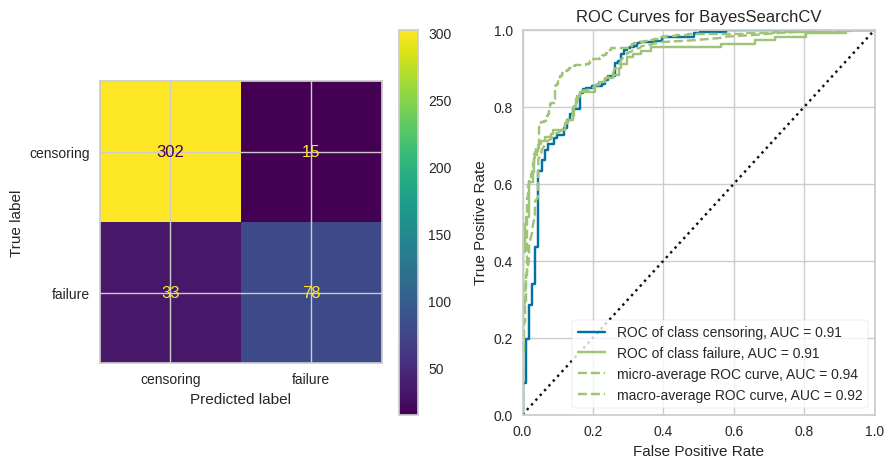

In [ ]:
model = mlp_bs
print(classification_report(model.predict(aids_test_X_sd), aids_test_y,target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X_sd,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X_sd, aids_train_y, aids_test_X_sd, aids_test_y, classes=cls, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X_sd, aids_test_y, 'MLP', results_df);

### SVM con kernel RBF

In [ ]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto']}

svcrbf =  SVC(kernel='rbf', max_iter=25000, random_state=0)
svcrbf_bs = BayesSearchCV(svcrbf,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)
svcrbf_bs.fit(aids_train_X_mm, aids_train_y);

show_html(pd.DataFrame(svcrbf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
13,"{'C': 125.89254117941663, 'gamma': 'auto'}",0.878434,1
12,"{'C': 6.918309709189363, 'gamma': 'scale'}",0.867335,2
10,"{'C': 331.13112148259074, 'gamma': 'auto'}",0.863825,3
0,"{'C': 1.513561248436207, 'gamma': 'scale'}",0.859741,4
7,"{'C': 1.1481536214968828, 'gamma': 'scale'}",0.856238,5


              precision    recall  f1-score   support

   censoring       0.95      0.89      0.92       337
     failure       0.68      0.82      0.74        91

    accuracy                           0.88       428
   macro avg       0.81      0.86      0.83       428
weighted avg       0.89      0.88      0.88       428



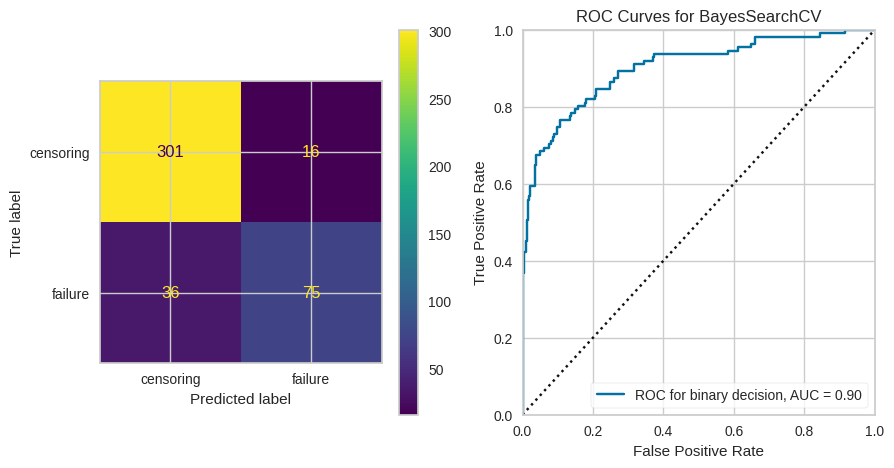

In [ ]:
model = svcrbf_bs
print(classification_report(model.predict(aids_test_X_mm), aids_test_y,target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X_mm,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X_mm, aids_train_y, aids_test_X_mm, aids_test_y, classes=cls,binary=True, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X_mm, aids_test_y, 'SVM', results_df);

### Gradient boosting

In [ ]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200],
         'loss':['log_loss', 'exponential'],
         'criterion':['friedman_mse', 'squared_error'],
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10],
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gb =  GradientBoostingClassifier(random_state=0,n_iter_no_change=5)
gb_bs =  BayesSearchCV(gb,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(aids_train_X_sd, aids_train_y)

show_html(pd.DataFrame(gb_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 25}",0.890708,1
4,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.888377,2
12,"{'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.888377,2
10,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 5}",0.887787,4
2,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.884277,5


              precision    recall  f1-score   support

   censoring       0.96      0.90      0.93       337
     failure       0.70      0.86      0.77        91

    accuracy                           0.89       428
   macro avg       0.83      0.88      0.85       428
weighted avg       0.90      0.89      0.90       428



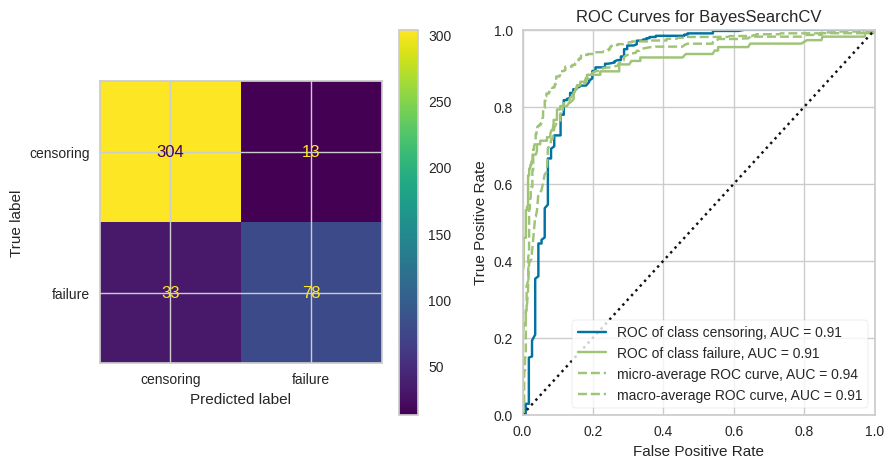

In [ ]:
model = gb_bs
print(classification_report(model.predict(aids_test_X_sd), aids_test_y,target_names=cls))

fig, axes = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(model, aids_test_X_sd,aids_test_y, display_labels=cls, ax=axes.reshape(-1)[0])
roc_auc(model, aids_train_X_sd, aids_train_y, aids_test_X_sd, aids_test_y, classes=cls, ax=axes.reshape(-1)[1]);

results_df = save_results(model, aids_test_X_sd, aids_test_y, 'Gradient boosting', results_df);

## Resultados

In [ ]:
results_df

,train acc,test acc,precision score (W),recall score (W),f1 score (W)
Logistic,0.865582,0.850467,0.844812,0.850467,0.844132
GNB,0.832280,0.831776,0.827534,0.831776,0.829114
KNN,0.793705,0.773364,0.752743,0.773364,0.736987
MLP,0.882536,0.887850,0.885210,0.887850,0.884451
SVM,0.878434,0.878505,0.875280,0.878505,0.874348
Gradient boosting,0.890708,0.892523,0.890424,0.892523,0.888846
